In [1]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [2]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
train_data


,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,NaN,NaN,...,318,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,NaN,NaN,...,14,NaN,NaN,197,NaN,NaN,1,NaN,NaN,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,NaN,NaN,...,1,NaN,NaN,27,NaN,NaN,1,NaN,NaN,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,NaN,NaN,...,117,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


In [3]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))
test_data

,Set ID,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,0001be084fbc4aaa9d921f39e595961b,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3J1XF767-1,1,OK,1000.0,NaN,...,195,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
1,0005bbd180064abd99e63f9ed3e1ac80,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4B1XD472-2,1,OK,1000.0,NaN,...,14,NaN,NaN,256,NaN,NaN,1,NaN,NaN,NaN
2,000948934c4140d883d670adcb609584,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3H1XE355-1,1,OK,240.0,NaN,...,98,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
3,000a6bfd02874c6296dc7b2e9c5678a7,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3L1XA128-1,1,OK,1000.0,NaN,...,14,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN
4,0018e78ce91343678716e2ea27a51c95,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4A1XA639-1,1,OK,240.0,NaN,...,1,NaN,NaN,215,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1XB597-1,1,OK,1000.0,NaN,...,14,NaN,NaN,131,NaN,NaN,1,NaN,NaN,NaN
17357,ffed8923c8a448a98afc641b770be153,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4A1XB974-1,1,OK,1000.0,NaN,...,12,NaN,NaN,279,NaN,NaN,1,NaN,NaN,NaN
17358,fff1e73734da40adbe805359b3efb462,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3L1XA998-1,1,OK,240.0,NaN,...,4,NaN,NaN,66,NaN,NaN,1,NaN,NaN,NaN
17359,fff8e38bdd09470baf95f71e92075dec,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1XC376-1,1,OK,240.0,NaN,...,117,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN


In [4]:
test_data.shape

(17361, 465)

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40506 entries, 0 to 40505
Columns: 464 entries, Wip Line_Dam to target
dtypes: float64(350), int64(77), object(37)
memory usage: 143.4+ MB


In [6]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17361 entries, 0 to 17360
Columns: 465 entries, Set ID to target
dtypes: float64(351), int64(77), object(37)
memory usage: 61.6+ MB


In [7]:
# 'tt' 칼럼 추가
train_data['tt'] = 'train'
test_data['tt'] = 'test'

In [8]:
train_target = train_data['target']
testSet = test_data['Set ID']
test_target = test_data['target']

In [9]:
test_data = test_data.drop(columns=['Set ID', 'target'])

In [10]:
train_data = train_data.drop(columns = ['target'])

In [11]:
target = pd.concat([train_target, test_target], ignore_index=True)

In [12]:
# 데이터프레임 결합
df = pd.concat([train_data, test_data], ignore_index=True)

In [13]:
# 각 열별 결측치 개수 확인
missing_values_count = (df.isnull().sum())
missing_values_count = missing_values_count/df.shape[0] 
missing_values_ratio = missing_values_count * 100
print(missing_values_ratio)

Wip Line_Dam                       0.0
Process Desc._Dam                  0.0
Equipment_Dam                      0.0
Model.Suffix_Dam                   0.0
Workorder_Dam                      0.0
                                 ...  
Receip No Judge Value_Fill2      100.0
WorkMode Collect Result_Fill2      0.0
WorkMode Unit Time_Fill2         100.0
WorkMode Judge Value_Fill2       100.0
tt                                 0.0
Length: 464, dtype: float64


In [14]:
bins = [0, 20, 40, 60, 80, 100]
missing_values_counts = pd.cut(missing_values_ratio, bins=bins).value_counts().sort_index()

print(missing_values_counts)

(0, 20]        0
(20, 40]       3
(40, 60]       0
(60, 80]       5
(80, 100]    278
Name: count, dtype: int64


(20, 40]에 대해서는 결측치를 채우는 과정을 수행한다.

In [15]:
# 결측치 비율이 30 이상인 열 삭제
threshold = 30
df= df.drop(columns=missing_values_ratio[missing_values_ratio >= threshold].index)


In [16]:
df.isnull().sum().sum()

0

In [17]:
# 상수 열 삭제
constant_columns = [col for col in df.columns if df[col].nunique() == 1]
df = df.drop(columns=constant_columns)
print(df.shape[1])

143


In [18]:
Qty = [col for col in df.columns if "Qty" in col]
Qty

['Production Qty Collect Result_Dam',
 'Production Qty Collect Result_Fill1',
 'Production Qty Collect Result_Fill2']

In [19]:
# 특정 열을 더하여 새로운 열 생성
df['Total_Production_Qty'] = df[['Production Qty Collect Result_Dam', 
                                   'Production Qty Collect Result_Fill1', 
                                   'Production Qty Collect Result_Fill2']].sum(axis=1)

# 결과 출력
print("\nDataFrame after adding columns:")
print(df)


DataFrame after adding columns:
          Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
0      Dam dispenser #1      AJX75334505    4F1XA938-1   
1      Dam dispenser #1      AJX75334505    3KPM0016-2   
2      Dam dispenser #2      AJX75334501    4E1X9167-1   
3      Dam dispenser #2      AJX75334501    3K1X0057-1   
4      Dam dispenser #1      AJX75334501    3HPM0007-1   
...                 ...              ...           ...   
57862  Dam dispenser #2      AJX75334501    3K1XB597-1   
57863  Dam dispenser #2      AJX75334501    4A1XB974-1   
57864  Dam dispenser #1      AJX75334501    3L1XA998-1   
57865  Dam dispenser #1      AJX75334501    3F1XC376-1   
57866  Dam dispenser #1      AJX75334501    3J1XC756-1   

       CURE END POSITION X Collect Result_Dam  \
0                                       240.0   
1                                       240.0   
2                                      1000.0   
3                                      1000.0   
4                        

In [20]:
df.isnull().sum().sum()

0

In [21]:
press_time = [col for col in df.columns if "Pressure" in col]
press_time

['1st Pressure Collect Result_AutoClave',
 '1st Pressure 1st Pressure Unit Time_AutoClave',
 '2nd Pressure Collect Result_AutoClave',
 '2nd Pressure Unit Time_AutoClave',
 '3rd Pressure Collect Result_AutoClave',
 '3rd Pressure Unit Time_AutoClave']

In [22]:
Unit = [col for col in df.columns if "Pressure Unit" in col]
Unit

['1st Pressure 1st Pressure Unit Time_AutoClave',
 '2nd Pressure Unit Time_AutoClave',
 '3rd Pressure Unit Time_AutoClave']

In [23]:
PC = [col for col in df.columns if "Pressure Collect" in col]
PC

['1st Pressure Collect Result_AutoClave',
 '2nd Pressure Collect Result_AutoClave',
 '3rd Pressure Collect Result_AutoClave']

In [24]:

# 필요한 열들을 계산

data={}

data['Total Pressure_AutoClave'] = (
    df[PC[0]] +
    df[PC[1]] +
    df[PC[2]]
)

data['Total Press Unit time_AutoClave'] = (
    df[press_time[1]] +
    df[press_time[3]] +
    df[press_time[5]]
)/3

data['std_PU_AutoClave'] = df[Unit].std(axis=1)
# 계산된 모든 열을 DataFrame에 한 번에 추가P
data['std_TP_AutoClave'] = df[PC].std(axis=1)

df = pd.concat([df, pd.DataFrame(data)], axis=1)

# 결과 확인
df.head()

,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,tt,Total_Production_Qty,Total Pressure_AutoClave,Total Press Unit time_AutoClave,std_PU_AutoClave,std_TP_AutoClave
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,19.9,7,127,1,train,21,1.304,120.333333,119.500349,0.106275
1,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1030,-90,10,...,7.0,185,1,0,train,555,1.120,161.000000,69.282032,0.107965
2,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,19.8,10,73,1,train,30,1.303,121.000000,120.000000,0.103423
3,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,280,90,10,...,12.0,268,1,0,train,804,1.099,161.000000,69.282032,0.115760
4,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1030,-90,10,...,8.0,121,1,0,train,363,1.102,160.000000,69.282032,0.113161


In [25]:
time_columns = [col for col in df.columns if "TIME" in col]
time_columns

['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']

In [26]:
Discharged = [col for col in df.columns if "DISCHARGED" in col]
Discharged

['DISCHARGED SPEED OF RESIN Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
 'DISCHARGED SPEED OF RESIN Collect Result_Fill1',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']

In [27]:

# DISCHARGED Volume_Dam: SPEED * 각 Stage의 TIME을 합하여 생성
df['DISCHARGED Volume_Dam'] = df['DISCHARGED SPEED OF RESIN Collect Result_Dam'] * (
    df['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam'] +
    df['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam'] +
    df['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam'])

# DISCHARGED Volume_Fill1: SPEED * 각 Stage의 TIME을 합하여 생성
df['DISCHARGED Volume_Fill1'] = df['DISCHARGED SPEED OF RESIN Collect Result_Fill1'] * (
    df['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1'] +
    df['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1'] +
    df['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1'])

# DISCHARGED Total Time_Dam: 각 Stage의 Time을 합하여 생성
df['DISCHARGED Total Time_Dam'] = df[
    ['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
     'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
     'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam']
].sum(axis=1)

# DISCHARGED Total Time_Fill1: 각 Stage의 Time을 합하여 생성
df['DISCHARGED Total Time_Fill1'] = df[
    ['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
     'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
     'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1']
].sum(axis=1)

# DISCHARGED Time rate(Stage1)_Dam: Stage1의 Time / Total Time_Dam
df['DISCHARGED Time rate(Stage1)_Dam'] = df['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam'] / df['DISCHARGED Total Time_Dam']

# DISCHARGED Time rate(Stage2)_Dam: Stage2의 Time / Total Time_Dam
df['DISCHARGED Time rate(Stage2)_Dam'] = df['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam'] / df['DISCHARGED Total Time_Dam']

# DISCHARGED Time rate(Stage3)_Dam: Stage3의 Time / Total Time_Dam
df['DISCHARGED Time rate(Stage3)_Dam'] = df['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam'] / df['DISCHARGED Total Time_Dam']

# DISCHARGED Time rate(Stage1)_Fill1: Stage1의 Time / Total Time_Fill1
df['DISCHARGED Time rate(Stage1)_Fill1'] = df['DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1'] / df['DISCHARGED Total Time_Fill1']

# DISCHARGED Time rate(Stage2)_Fill1: Stage2의 Time / Total Time_Fill1
df['DISCHARGED Time rate(Stage2)_Fill1'] = df['DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1'] / df['DISCHARGED Total Time_Fill1']

# DISCHARGED Time rate(Stage3)_Fill1: Stage3의 Time / Total Time_Fill1
df['DISCHARGED Time rate(Stage3)_Fill1'] = df['DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1'] / df['DISCHARGED Total Time_Fill1']

# 생성된 데이터프레임 확인
df.head()


,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,DISCHARGED Volume_Dam,DISCHARGED Volume_Fill1,DISCHARGED Total Time_Dam,DISCHARGED Total Time_Fill1,DISCHARGED Time rate(Stage1)_Dam,DISCHARGED Time rate(Stage2)_Dam,DISCHARGED Time rate(Stage3)_Dam,DISCHARGED Time rate(Stage1)_Fill1,DISCHARGED Time rate(Stage2)_Fill1,DISCHARGED Time rate(Stage3)_Fill1
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,608.0,306.34,38.0,28.9,0.392105,0.221053,0.386842,0.439446,0.124567,0.435986
1,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1030,-90,10,...,475.0,324.36,47.5,30.6,0.448421,0.103158,0.448421,0.441176,0.117647,0.441176
2,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,606.4,322.24,37.9,30.4,0.387863,0.224274,0.387863,0.444079,0.115132,0.440789
3,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,280,90,10,...,510.0,324.36,51.0,30.6,0.417647,0.164706,0.417647,0.441176,0.117647,0.441176
4,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1030,-90,10,...,242.0,324.36,24.2,30.6,0.400826,0.202479,0.396694,0.441176,0.117647,0.441176


In [28]:
import pandas as pd

# 필요한 열들을 가정합니다.
discharged_columns = [
    'DISCHARGED SPEED OF RESIN Collect Result_Dam',
    'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
    'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
    'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
    'DISCHARGED SPEED OF RESIN Collect Result_Fill1',
    'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Fill1',
    'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Fill1',
    'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Fill1'
]

# Stage 1, 2, 3의 Volume을 계산
df['DISCHARGED Volume(Stage1)_Dam'] = df[discharged_columns[0]] * df[discharged_columns[1]]
df['DISCHARGED Volume(Stage2)_Dam'] = df[discharged_columns[0]] * df[discharged_columns[2]]
df['DISCHARGED Volume(Stage3)_Dam'] = df[discharged_columns[0]] * df[discharged_columns[3]]

df['DISCHARGED Volume(Stage1)_Fill1'] = df[discharged_columns[4]] * df[discharged_columns[5]]
df['DISCHARGED Volume(Stage2)_Fill1'] = df[discharged_columns[4]] * df[discharged_columns[6]]
df['DISCHARGED Volume(Stage3)_Fill1'] = df[discharged_columns[4]] * df[discharged_columns[7]]


df.head()


,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,DISCHARGED Time rate(Stage3)_Dam,DISCHARGED Time rate(Stage1)_Fill1,DISCHARGED Time rate(Stage2)_Fill1,DISCHARGED Time rate(Stage3)_Fill1,DISCHARGED Volume(Stage1)_Dam,DISCHARGED Volume(Stage2)_Dam,DISCHARGED Volume(Stage3)_Dam,DISCHARGED Volume(Stage1)_Fill1,DISCHARGED Volume(Stage2)_Fill1,DISCHARGED Volume(Stage3)_Fill1
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,0.386842,0.439446,0.124567,0.435986,238.4,134.4,235.2,134.62,38.16,133.56
1,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1030,-90,10,...,0.448421,0.441176,0.117647,0.441176,213.0,49.0,213.0,143.10,38.16,143.10
2,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,0.387863,0.444079,0.115132,0.440789,235.2,136.0,235.2,143.10,37.10,142.04
3,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,280,90,10,...,0.417647,0.441176,0.117647,0.441176,213.0,84.0,213.0,143.10,38.16,143.10
4,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1030,-90,10,...,0.396694,0.441176,0.117647,0.441176,97.0,49.0,96.0,143.10,38.16,143.10


In [29]:
# 데이터프레임 내 모든 컬럼에 결측치가 있는 행 찾기
missing_values = df[df.isna().any(axis=1)]
print(missing_values)

          Equipment_Dam Model.Suffix_Dam Workorder_Dam  \
37520  Dam dispenser #2      AJX75334501    3M1XC484-1   

       CURE END POSITION X Collect Result_Dam  \
37520                                  1000.0   

       CURE END POSITION Z Collect Result_Dam  \
37520                                    12.5   

       CURE END POSITION Θ Collect Result_Dam  CURE SPEED Collect Result_Dam  \
37520                                      90                             70   

       CURE START POSITION X Collect Result_Dam  \
37520                                       280   

       CURE START POSITION Θ Collect Result_Dam  \
37520                                        90   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  ...  \
37520                                            16  ...   

       DISCHARGED Time rate(Stage3)_Dam  DISCHARGED Time rate(Stage1)_Fill1  \
37520                          0.401216                                 NaN   

       DISCHARGED Time rate(Stage2)_Fi

In [30]:
# df에서 missing_values에 해당하는 행을 삭제
df_cleaned = df.drop(index=missing_values.index)


In [31]:
# train_target에서 동일한 인덱스의 행 삭제
train_target_cleaned = train_target.drop(index=missing_values.index)


In [32]:
print(df_cleaned.shape)
print(train_target_cleaned.shape)
print(test_target.shape)

(57866, 164)
(40505,)
(17361,)


In [33]:
dispense = [col for col in df.columns if "Dispense" in col]
dispense

['Dispense Volume(Stage1) Collect Result_Dam',
 'Dispense Volume(Stage2) Collect Result_Dam',
 'Dispense Volume(Stage3) Collect Result_Dam',
 'Dispense Volume(Stage1) Collect Result_Fill1',
 'Dispense Volume(Stage2) Collect Result_Fill1',
 'Dispense Volume(Stage3) Collect Result_Fill1']

In [34]:
dam_columns = [col for col in df.columns if "Dam" in col]
dam_columns

['Equipment_Dam',
 'Model.Suffix_Dam',
 'Workorder_Dam',
 'CURE END POSITION X Collect Result_Dam',
 'CURE END POSITION Z Collect Result_Dam',
 'CURE END POSITION Θ Collect Result_Dam',
 'CURE SPEED Collect Result_Dam',
 'CURE START POSITION X Collect Result_Dam',
 'CURE START POSITION Θ Collect Result_Dam',
 'DISCHARGED SPEED OF RESIN Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
 'Dispense Volume(Stage1) Collect Result_Dam',
 'Dispense Volume(Stage2) Collect Result_Dam',
 'Dispense Volume(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
 'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam',
 'HEAD NORMAL COORDINATE Z 

In [35]:
# 중복된 열을 식별하고 제거
df_dup = df.loc[:, ~df.T.duplicated(keep='first')]

df_dup.shape

(57867, 142)

In [36]:
dam_columns = [col for col in df_dup.columns if "Suffix" in col]
dam_columns

['Model.Suffix_Dam']

In [37]:
df_dup.isnull().sum().sum()

3

In [39]:
df_dup

,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,...,DISCHARGED Time rate(Stage3)_Dam,DISCHARGED Time rate(Stage1)_Fill1,DISCHARGED Time rate(Stage2)_Fill1,DISCHARGED Time rate(Stage3)_Fill1,DISCHARGED Volume(Stage1)_Dam,DISCHARGED Volume(Stage2)_Dam,DISCHARGED Volume(Stage3)_Dam,DISCHARGED Volume(Stage1)_Fill1,DISCHARGED Volume(Stage2)_Fill1,DISCHARGED Volume(Stage3)_Fill1
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,16,14.9,...,0.386842,0.439446,0.124567,0.435986,238.4,134.4,235.2,134.62,38.16,133.56
1,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1030,10,21.3,...,0.448421,0.441176,0.117647,0.441176,213.0,49.0,213.0,143.10,38.16,143.10
2,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,16,14.7,...,0.387863,0.444079,0.115132,0.440789,235.2,136.0,235.2,143.10,37.10,142.04
3,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,280,10,21.3,...,0.417647,0.441176,0.117647,0.441176,213.0,84.0,213.0,143.10,38.16,143.10
4,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1030,10,9.7,...,0.396694,0.441176,0.117647,0.441176,97.0,49.0,96.0,143.10,38.16,143.10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57862,Dam dispenser #2,AJX75334501,3K1XB597-1,1000.0,12.5,90,70,280,10,21.3,...,0.400376,0.441176,0.117647,0.441176,213.0,106.0,213.0,143.10,38.16,143.10
57863,Dam dispenser #2,AJX75334501,4A1XB974-1,1000.0,12.5,90,70,280,16,13.2,...,0.388235,0.438776,0.122449,0.438776,211.2,121.6,211.2,136.74,38.16,136.74
57864,Dam dispenser #1,AJX75334501,3L1XA998-1,240.0,2.5,-90,70,1030,16,13.2,...,0.400000,0.435897,0.131410,0.432692,211.2,105.6,211.2,144.16,43.46,143.10
57865,Dam dispenser #1,AJX75334501,3F1XC376-1,240.0,2.5,-90,70,1030,10,9.7,...,0.416309,0.420382,0.159236,0.420382,97.0,39.0,97.0,143.88,54.50,143.88


In [40]:
dam_columns = [col for col in df_dup.columns if "Suffix" in col]
dam_columns

['Model.Suffix_Dam']

In [41]:
# 마지막 자리의 문자(int로 변환) 추출하여 새로운 열 추가
df_dup['Last_Character_Int'] = df_dup['Model.Suffix_Dam'].str[-1].astype(int)
df_dup['Last_Equipment_Dam'] = df_dup['Equipment_Dam'].str[-1].astype(int)

# 기존 열 제거
df_dup.drop(columns=['Model.Suffix_Dam'], inplace=True)
df_dup.drop(columns=['Equipment_Dam'], inplace=True)

print(df_dup)

      Workorder_Dam  CURE END POSITION X Collect Result_Dam  \
0        4F1XA938-1                                   240.0   
1        3KPM0016-2                                   240.0   
2        4E1X9167-1                                  1000.0   
3        3K1X0057-1                                  1000.0   
4        3HPM0007-1                                   240.0   
...             ...                                     ...   
57862    3K1XB597-1                                  1000.0   
57863    4A1XB974-1                                  1000.0   
57864    3L1XA998-1                                   240.0   
57865    3F1XC376-1                                   240.0   
57866    3J1XC756-1                                   240.0   

       CURE END POSITION Z Collect Result_Dam  \
0                                         2.5   
1                                         2.5   
2                                        12.5   
3                                        12.5  

/tmp/ipykernel_72/3120385229.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Last_Character_Int'] = df_dup['Model.Suffix_Dam'].str[-1].astype(int)
/tmp/ipykernel_72/3120385229.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Last_Equipment_Dam'] = df_dup['Equipment_Dam'].str[-1].astype(int)
/tmp/ipykernel_72/3120385229.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas

In [42]:
df_dup['Last_Equipment_Fill1'] = df_dup['Equipment_Fill1'].str[-1].astype(int)
df_dup['Last_Equipment_Fill2'] = df_dup['Equipment_Fill2'].str[-1].astype(int)

# 기존 열 제거
df_dup.drop(columns=['Equipment_Fill1'], inplace=True)
df_dup.drop(columns=['Equipment_Fill2'], inplace=True)

/tmp/ipykernel_72/2670911257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Last_Equipment_Fill1'] = df_dup['Equipment_Fill1'].str[-1].astype(int)
/tmp/ipykernel_72/2670911257.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dup['Last_Equipment_Fill2'] = df_dup['Equipment_Fill2'].str[-1].astype(int)
/tmp/ipykernel_72/2670911257.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [43]:
df_dup

,Workorder_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam,...,DISCHARGED Volume(Stage1)_Dam,DISCHARGED Volume(Stage2)_Dam,DISCHARGED Volume(Stage3)_Dam,DISCHARGED Volume(Stage1)_Fill1,DISCHARGED Volume(Stage2)_Fill1,DISCHARGED Volume(Stage3)_Fill1,Last_Character_Int,Last_Equipment_Dam,Last_Equipment_Fill1,Last_Equipment_Fill2
0,4F1XA938-1,240.0,2.5,-90,100,1030,16,14.9,8.4,14.7,...,238.4,134.4,235.2,134.62,38.16,133.56,5,1,1,1
1,3KPM0016-2,240.0,2.5,-90,70,1030,10,21.3,4.9,21.3,...,213.0,49.0,213.0,143.10,38.16,143.10,5,1,1,1
2,4E1X9167-1,1000.0,12.5,90,85,280,16,14.7,8.5,14.7,...,235.2,136.0,235.2,143.10,37.10,142.04,1,2,2,2
3,3K1X0057-1,1000.0,12.5,90,70,280,10,21.3,8.4,21.3,...,213.0,84.0,213.0,143.10,38.16,143.10,1,2,2,2
4,3HPM0007-1,240.0,2.5,-90,70,1030,10,9.7,4.9,9.6,...,97.0,49.0,96.0,143.10,38.16,143.10,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57862,3K1XB597-1,1000.0,12.5,90,70,280,10,21.3,10.6,21.3,...,213.0,106.0,213.0,143.10,38.16,143.10,1,2,2,2
57863,4A1XB974-1,1000.0,12.5,90,70,280,16,13.2,7.6,13.2,...,211.2,121.6,211.2,136.74,38.16,136.74,1,2,2,2
57864,3L1XA998-1,240.0,2.5,-90,70,1030,16,13.2,6.6,13.2,...,211.2,105.6,211.2,144.16,43.46,143.10,1,1,1,1
57865,3F1XC376-1,240.0,2.5,-90,70,1030,10,9.7,3.9,9.7,...,97.0,39.0,97.0,143.88,54.50,143.88,1,1,1,1


In [44]:
# 피처 분리 함수 정의
# 피처 분리 함수 정의
def split_workorder_column(df, column_name):
    category_col = f'{column_name}_category'
    number_col = f'{column_name}_number'
    split_cols = df[column_name].str.split('-', expand=True)
    split_cols.columns = [category_col, number_col]
    split_cols[number_col] = split_cols[number_col].astype(int)  # 숫자 컬럼을 int 형식으로 변환
    return split_cols

# 모든 분리된 피처를 저장할 리스트
split_columns = []

# 각 피처에 대해 분리 작업 수행
process_columns = ['Workorder_Dam']
for column in process_columns:
    split_columns.append(split_workorder_column(df_dup, column))

# 분리된 모든 피처를 데이터프레임에 결합
df_dup = pd.concat([df_dup] + split_columns, axis=1)

print(df_dup)

      Workorder_Dam  CURE END POSITION X Collect Result_Dam  \
0        4F1XA938-1                                   240.0   
1        3KPM0016-2                                   240.0   
2        4E1X9167-1                                  1000.0   
3        3K1X0057-1                                  1000.0   
4        3HPM0007-1                                   240.0   
...             ...                                     ...   
57862    3K1XB597-1                                  1000.0   
57863    4A1XB974-1                                  1000.0   
57864    3L1XA998-1                                   240.0   
57865    3F1XC376-1                                   240.0   
57866    3J1XC756-1                                   240.0   

       CURE END POSITION Z Collect Result_Dam  \
0                                         2.5   
1                                         2.5   
2                                        12.5   
3                                        12.5  

In [99]:
df_dup.drop('Workorder_Dam', axis =1, inplace =True)

In [100]:
# 숫자형 데이터만 선택
numeric_df = df_dup.select_dtypes(include=[float, int])

# 상관관계 계산
correlation_matrix = numeric_df.corr()

# 상관관계 행렬 출력
print(correlation_matrix)

                                          CURE END POSITION X Collect Result_Dam  \
CURE END POSITION X Collect Result_Dam                                  1.000000   
CURE END POSITION Z Collect Result_Dam                                  1.000000   
CURE END POSITION Θ Collect Result_Dam                                  1.000000   
CURE SPEED Collect Result_Dam                                           0.075891   
CURE START POSITION X Collect Result_Dam                               -1.000000   
...                                                                          ...   
Last_Character_Int                                                      0.067200   
Last_Equipment_Dam                                                      1.000000   
Last_Equipment_Fill1                                                    0.998939   
Last_Equipment_Fill2                                                    0.998316   
Workorder_Dam_number                                                    0.00

In [101]:
# 상관관계 행렬의 절대값
corr_matrix = numeric_df.corr().abs()
# 상관관계가 1에 가까운 변수 식별
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 상관관계가 높은 변수 제거
to_drop = [column for column in upper.columns if any(upper[column] >= 0.95)]
numeric_df_drop = numeric_df.drop(columns=to_drop)

print("제거된 변수:", to_drop)
print(numeric_df_drop)

제거된 변수: ['CURE END POSITION Z Collect Result_Dam', 'CURE END POSITION Θ Collect Result_Dam', 'CURE START POSITION X Collect Result_Dam', 'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam', 'Dispense Volume(Stage3) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam', 'HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Dam', 'HEAD Standby Position Y Collect Result_Dam', 'HEAD Standby Position Z Collect Result_Dam', 'Head Clean Position X Collect Result_Dam', 'Head Clean Position Y Collect Result_Dam', 'Head Clean Position Z Collect Result_Dam', 'Head Purge Position X Collect Result_Dam', 'Head Purge Position Z Collect Result_Dam', 'Head Zero Position X Collect Result_Dam', 'Head Zero Position Y Collect Result_Dam', 'Head Zero Position Z Collect Result_Dam', 'Machine Tact time Collect Result_Dam', 'PalletID Collect Result_Dam', 'Stage1 Circle2 Distance Speed Collect Result_Dam', 'Stage1 Line1 Distance Speed Collect Result_Dam', 'Stage1 Line2 Distance Speed

In [125]:
# 범주형 데이터 열 확인
categorical_df = df_dup.select_dtypes(include=['object', 'category'])
categorical_columns = df_dup.select_dtypes(include=['object', 'category']).columns

# 범주형 데이터 열 개수 출력
num_categorical_columns = len(categorical_columns)
print(f"Number of categorical columns: {num_categorical_columns}")
print(f"Categorical columns: {categorical_columns.tolist()}")

Number of categorical columns: 3
Categorical columns: ['Chamber Temp. Judge Value_AutoClave', 'tt', 'Workorder_Dam_category']


In [47]:
numeric_df_drop.shape

(57867, 55)

In [48]:
from sklearn.preprocessing import StandardScaler

# StandardScaler 객체 생성
scaler = StandardScaler()

# numeric_df의 데이터를 스케일링
scaled_df = scaler.fit_transform(numeric_df_drop)

# 스케일링된 데이터를 DataFrame으로 변환 (원래의 column 이름 유지)
scaled_df = pd.DataFrame(scaled_df, columns=numeric_df_drop.columns)

Number of categorical columns: 4
Categorical columns: ['Workorder_Dam', 'Chamber Temp. Judge Value_AutoClave', 'tt', 'Workorder_Dam_category']


In [50]:
scaled_df.isnull().sum().sum()

2

In [51]:
categorical_df.isnull().sum().sum()

0

In [52]:
scaled_df.shape

(57867, 55)

In [53]:
categorical_df.shape

(57867, 4)

In [54]:
categorical_df

,Workorder_Dam,Chamber Temp. Judge Value_AutoClave,tt,Workorder_Dam_category
0,4F1XA938-1,OK,train,4F1XA938
1,3KPM0016-2,OK,train,3KPM0016
2,4E1X9167-1,OK,train,4E1X9167
3,3K1X0057-1,OK,train,3K1X0057
4,3HPM0007-1,NG,train,3HPM0007
...,...,...,...,...
57862,3K1XB597-1,OK,test,3K1XB597
57863,4A1XB974-1,OK,test,4A1XB974
57864,3L1XA998-1,OK,test,3L1XA998
57865,3F1XC376-1,OK,test,3F1XC376


In [124]:
numeric_df_drop.shape

(57867, 55)

In [126]:
# 두 데이터프레임 결합
combined_df = pd.concat([scaled_df, categorical_df], axis=1)
print(combined_df)

       CURE END POSITION X Collect Result_Dam  CURE SPEED Collect Result_Dam  \
0                                       240.0                            100   
1                                       240.0                             70   
2                                      1000.0                             85   
3                                      1000.0                             70   
4                                       240.0                             70   
...                                       ...                            ...   
57862                                  1000.0                             70   
57863                                  1000.0                             70   
57864                                   240.0                             70   
57865                                   240.0                             70   
57866                                   240.0                             70   

       DISCHARGED SPEED OF RESIN Collec

In [127]:
combined_df.isnull().sum().sum()

2

In [128]:
missing_values = combined_df[combined_df.isna().any(axis=1)]
print(missing_values)

       CURE END POSITION X Collect Result_Dam  CURE SPEED Collect Result_Dam  \
37520                                  1000.0                             70   

       DISCHARGED SPEED OF RESIN Collect Result_Dam  \
37520                                            16   

       DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam  \
37520                                               13.2     

       DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam  \
37520                                                6.5     

       Dispense Volume(Stage1) Collect Result_Dam  \
37520                                        1.45   

       Dispense Volume(Stage2) Collect Result_Dam  \
37520                                        0.71   

       HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam  \
37520                                              164.2          

       HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam  \
37520                                              467.1      

In [129]:
# 결측치가 있는 행의 인덱스 가져오기
missing_indices = missing_values.index

# df에서 해당 인덱스의 행 삭제
combined_df_cleaned = combined_df.drop(index=missing_indices)

# train_target에서 해당 인덱스의 행 삭제
train_target_cleaned = train_target.drop(index=missing_indices)


In [130]:
train=combined_df_cleaned[df['tt']=='train']
test =combined_df_cleaned[df['tt']=='test']

/tmp/ipykernel_72/1070552744.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  train=combined_df_cleaned[df['tt']=='train']
/tmp/ipykernel_72/1070552744.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  test =combined_df_cleaned[df['tt']=='test']


In [136]:
train.drop(columns='tt', axis =1, inplace=True)
test.drop(columns='tt', axis =1, inplace=True)

/tmp/ipykernel_72/2559744941.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns='tt', axis =1, inplace=True)
/tmp/ipykernel_72/2559744941.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns='tt', axis =1, inplace=True)


In [137]:
train_target_cleaned.shape

(40505,)

In [138]:
test_target.shape

(17361,)

In [139]:
train.shape

(40505, 57)

In [140]:
X= train
y = train_target_cleaned

In [141]:
X.shape

(40505, 57)

In [142]:
X.isnull().sum().sum()

0

In [143]:
X_test = test

In [144]:
from imblearn.under_sampling import RandomUnderSampler

# 각 클래스의 샘플 수 확인
class_counts = y.value_counts()

# 다수 클래스와 소수 클래스 확인
majority_class = class_counts.idxmax()
minority_class = class_counts.idxmin()

# 2:1 비율로 다운샘플링
sampling_strategy = {majority_class: class_counts[minority_class] * 2}

# 다운샘플링 객체 생성
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)

# 다운샘플링 적용
X_resampled, y_resampled = rus.fit_resample(X, y)

# 결과 확인
print(f"다운샘플링 후 클래스 비율:\n{pd.Series(y_resampled).value_counts()}")


다운샘플링 후 클래스 비율:
target
Normal      4698
AbNormal    2349
Name: count, dtype: int64


In [158]:
# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=21)


In [148]:
X_train = X_res_decoded

In [149]:
y_train = y_res

In [150]:
X.shape

(40505, 57)

In [151]:
test.shape

(17361, 57)

In [152]:
X.isnull().sum().sum()

0

In [153]:
y.isnull().sum()

0

In [154]:
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()  # 범주형 변수 찾기
cat_features

['Chamber Temp. Judge Value_AutoClave', 'Workorder_Dam_category']

In [165]:
X_train.shape

(5637, 57)

In [159]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, f1_score
import numpy as np

# 데이터 준비 (예시)
# X, y 데이터프레임이 있다고 가정합니다.
# X, y = ... (여기에 실제 데이터를 로드하세요)

# 범주형 변수 인덱스 찾기
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()  # 범주형 변수 찾기
cat_feature_indices = [X_train.columns.get_loc(col) for col in cat_features]  # 인덱스 찾기

# K-fold 교차 검증 설정
kf = KFold(n_splits=3, shuffle=True, random_state=21)
f1_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    # 모델 생성
    model = CatBoostClassifier(random_state=21, verbose=0)

    # 모델 학습
    model.fit(X_train_kf, y_train_kf, cat_features=cat_feature_indices)

    # 예측
    y_pred_kf = model.predict(X_val_kf)

    # 성능 평가
    f1 = f1_score(y_val_kf, y_pred_kf, average='weighted')
    f1_scores.append(f1)

# 전체 F1 Score 평균
print("Average F1 Score:", np.mean(f1_scores))

# 전체 검증 데이터에 대해 모델 학습 및 예측
model.fit(X_train, y_train, cat_features=cat_feature_indices)
y_pred = model.predict(X_val)

# 성능 평가
print("Classification Report:\n", classification_report(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

Average F1 Score: 0.6611262687209031
Classification Report:
               precision    recall  f1-score   support

    AbNormal       0.64      0.24      0.35       485
      Normal       0.70      0.93      0.80       925

    accuracy                           0.69      1410
   macro avg       0.67      0.58      0.57      1410
weighted avg       0.68      0.69      0.64      1410

F1 Score: 0.643124302599518


In [161]:
test_pred = model.predict(X_test)
test_pred

array(['AbNormal', 'Normal', 'AbNormal', ..., 'Normal', 'Normal',
       'Normal'], dtype=object)

In [162]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

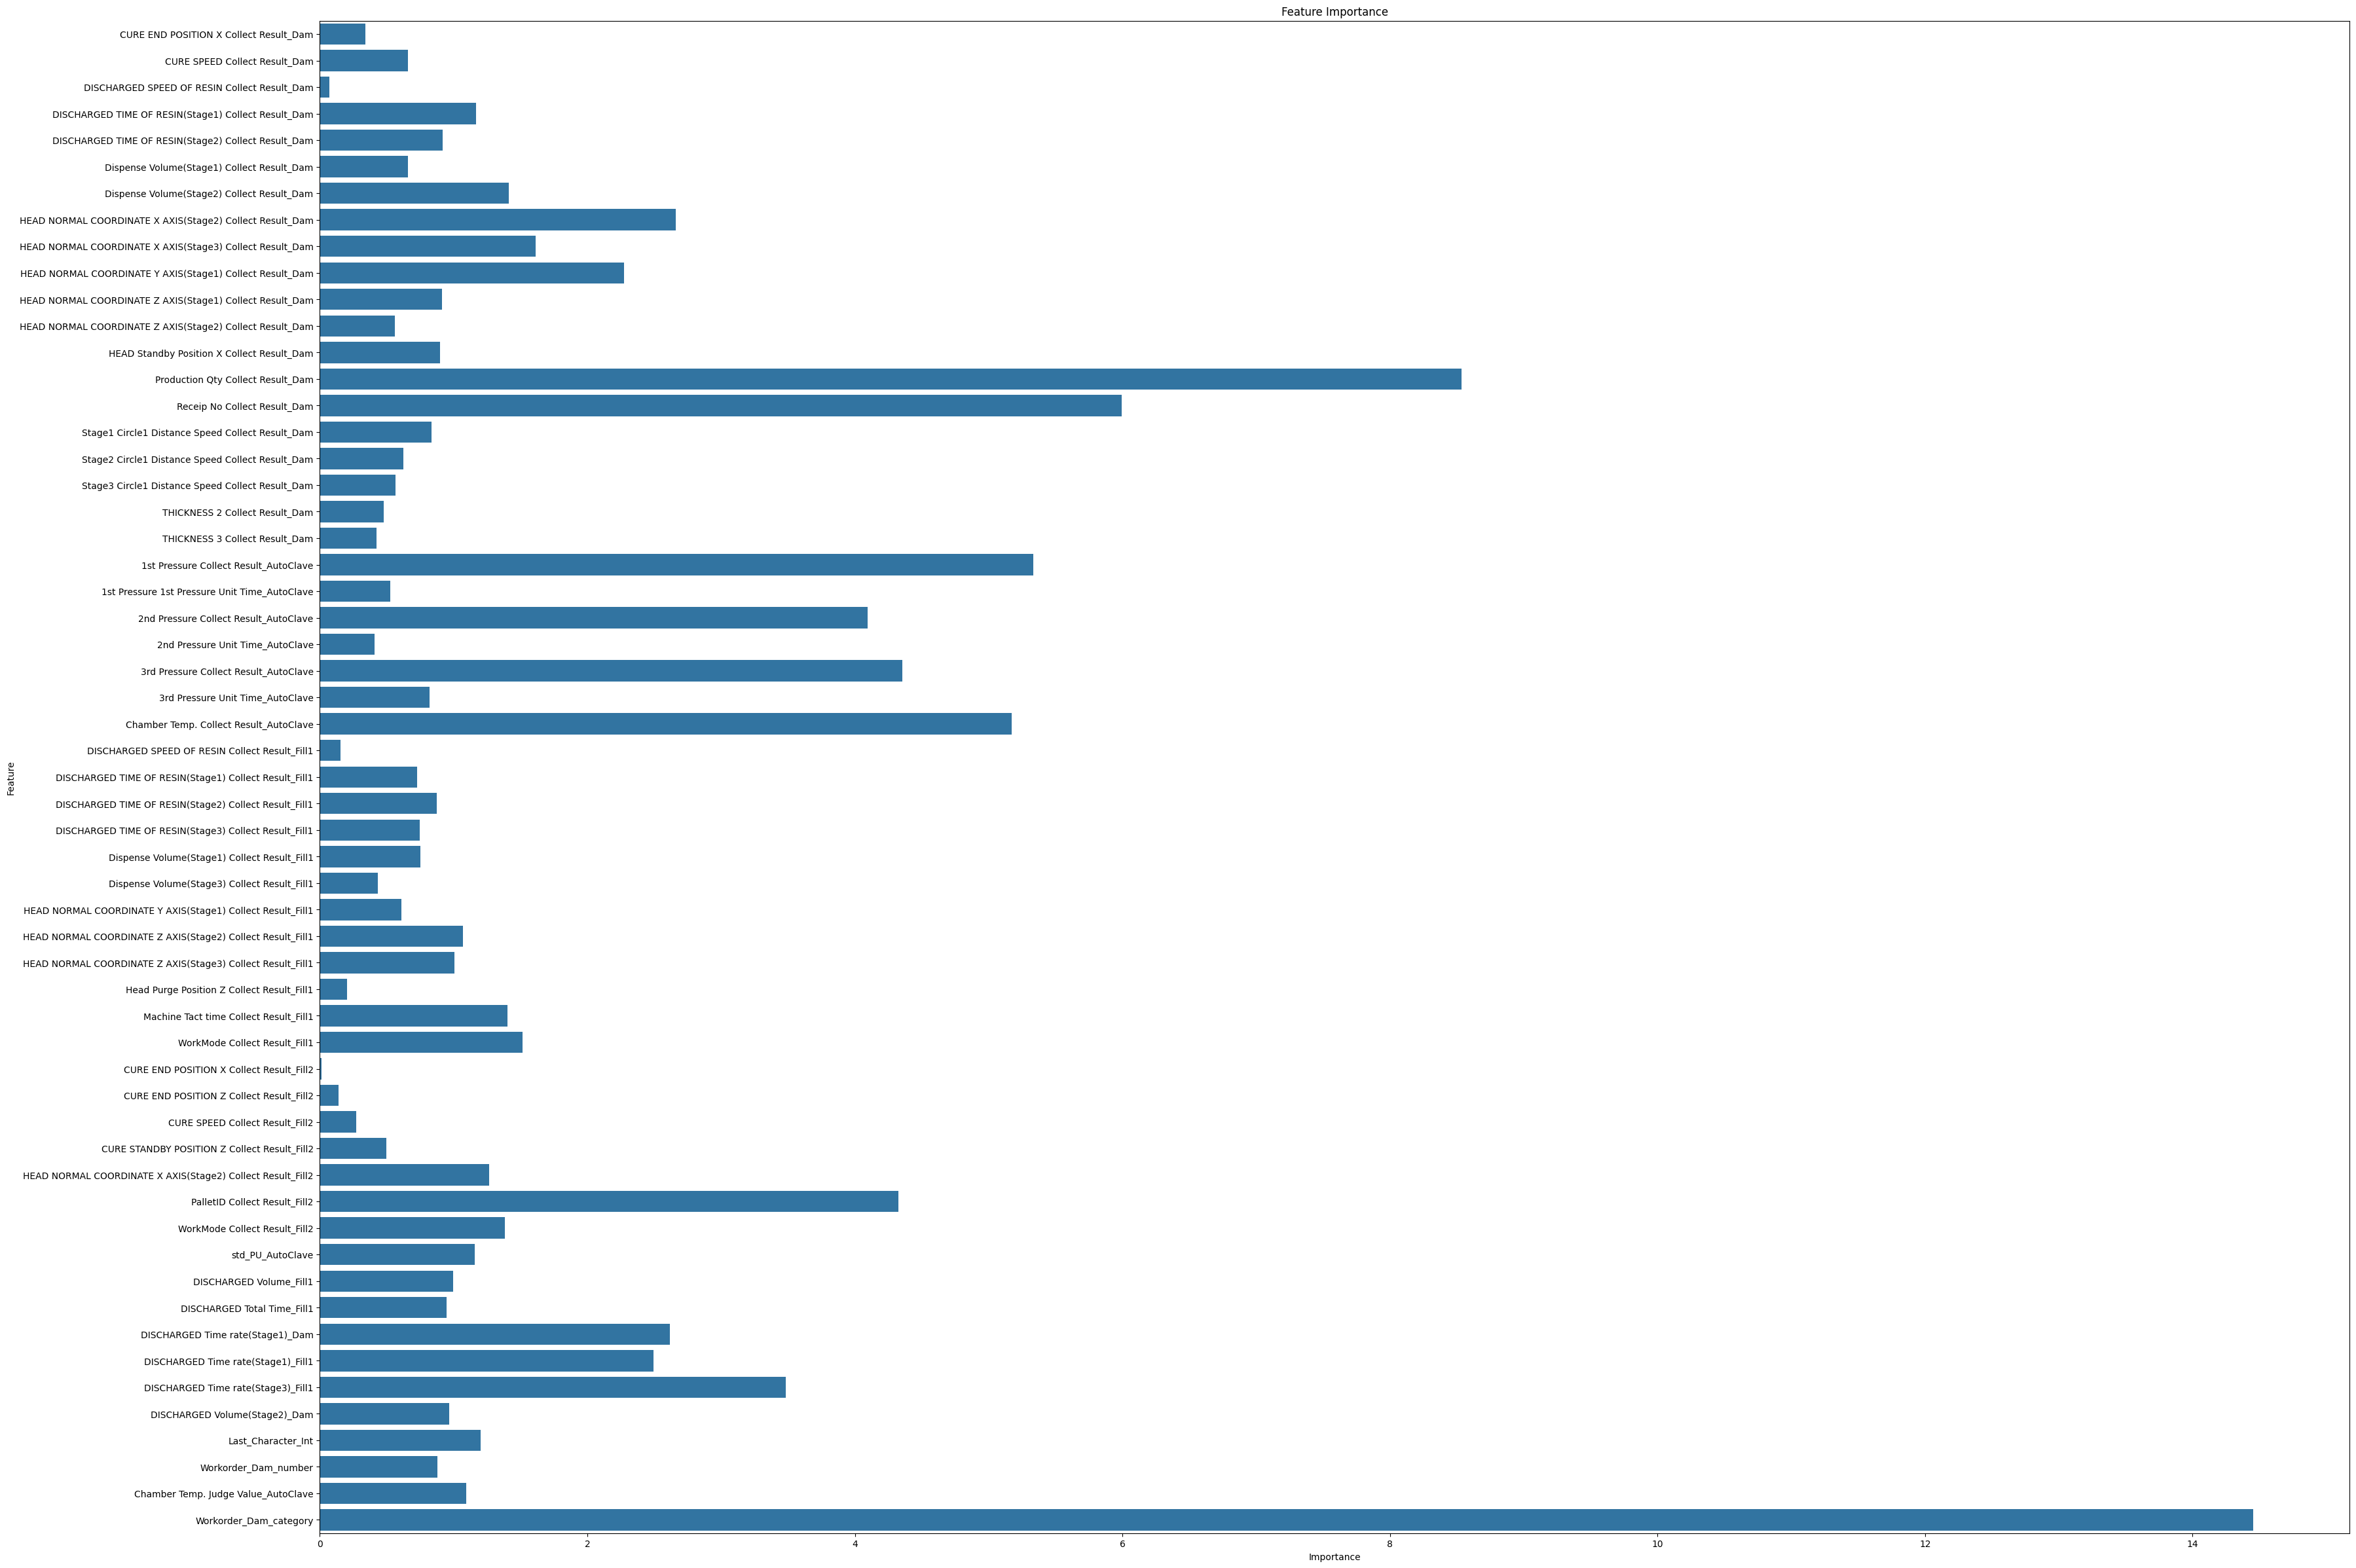

In [163]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 피처 중요도 추출
feature_importances = model.feature_importances_

# 데이터프레임 생성
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# 그래프 크기 설정
plt.figure(figsize=(40, 30))  # 그래프 크기를 12x8 인치로 설정

# 시각화
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title('Feature Importance')  # 제목 추가
plt.xlabel('Importance')  # X축 라벨
plt.ylabel('Feature')  # Y축 라벨
plt.show()


In [1]:
# 피처 이름과 중요도를 데이터프레임으로 정리
feature_importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})

# Importance 컬럼을 기준으로 DataFrame 설정
feature_importances_df.set_index('Feature', inplace=True)

# 중요도가 0.01 이하인 피처 제거
threshold = 0.01
selected_features = feature_importances_df[feature_importances_df['Importance'] > threshold].index

# X_train에서 선택된 피처만 선택
X_train_selected = X_train[selected_features]
X_val_selected = X_val[selected_features]
X_test_selected = X_test[selected_features]
# 결과 확인

X_train = X_train_selected
X_val = X_val_selected

NameError: name 'pd' is not defined

In [168]:
import pandas as pd
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import classification_report, f1_score
import numpy as np

# 데이터 준비 (예시)
# X, y 데이터프레임이 있다고 가정합니다.
# X, y = ... (여기에 실제 데이터를 로드하세요)

# 범주형 변수 인덱스 찾기
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()  # 범주형 변수 찾기
cat_feature_indices = [X_train.columns.get_loc(col) for col in cat_features]  # 인덱스 찾기

# K-fold 교차 검증 설정
kf = KFold(n_splits=3, shuffle=True, random_state=20)
f1_scores = []

for train_index, val_index in kf.split(X_train):
    X_train_kf, X_val_kf = X_train.iloc[train_index], X_train.iloc[val_index]
    y_train_kf, y_val_kf = y_train.iloc[train_index], y_train.iloc[val_index]

    # 모델 생성
    model = CatBoostClassifier(random_state=21, verbose=0)

    # 모델 학습
    model.fit(X_train_kf, y_train_kf, cat_features=cat_feature_indices)

    # 예측
    y_pred_kf = model.predict(X_val_kf)

    # 성능 평가
    f1 = f1_score(y_val_kf, y_pred_kf, average='weighted')
    f1_scores.append(f1)

# 전체 F1 Score 평균
print("Average F1 Score:", np.mean(f1_scores))

# 전체 검증 데이터에 대해 모델 학습 및 예측
model.fit(X_train, y_train, cat_features=cat_feature_indices)
y_pred = model.predict(X_val)

# 성능 평가
print("Classification Report:\n", classification_report(y_val, y_pred))
print("F1 Score:", f1_score(y_val, y_pred, average='weighted'))

Average F1 Score: 0.6492136015333633
Classification Report:
               precision    recall  f1-score   support

    AbNormal       0.65      0.22      0.33       485
      Normal       0.70      0.94      0.80       925

    accuracy                           0.69      1410
   macro avg       0.68      0.58      0.57      1410
weighted avg       0.68      0.69      0.64      1410

F1 Score: 0.639127114020731
